In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import fabio, sys, h5py
import sys, os
import pandas as pd
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.integrate import quad

sys.path.insert(0, '/Users/sharonberkowicz/Nextcloud/Research/Cryoprotectants/xrd/scripts')

In [3]:
# set path for working directory
os.chdir('/Users/sharonberkowicz/Nextcloud/Research/Cryoprotectants/xrd')
path=os.getcwd()
path

'/Users/sharonberkowicz/Nextcloud/Research/cryoprotectants/xrd'

In [4]:
from files_tools import*
from atomic_form_factor import*

In [5]:
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [6]:
from lmfit.models import Model
def model_func(x, off, w): 
    return w*x-off

def model_func2(x, w): 
    return w*x


def subtr_offset(Iq, Iq_bg, w=1.):
    off = w*Iq_bg[-1] - Iq[-1]
    Iq_nobg = Iq - (w*Iq_bg-off)
    
    return Iq_nobg, w, off 


def subtr_offset2(Iq, Iq_bg):
    xfit = np.append(Iq_bg[15:30], Iq_bg[430:])
    yfit = np.append(Iq[15:30], Iq[430:])
    
    model = Model(model_func) 
    pars = model.make_params()
    pars['off'].set(100)
    pars['w'].set(0.3, min=0)
    
    fit_model = model.fit(yfit, params=pars, x=xfit) # fitted amplitude and backgr
    wfit = fit_model.params['w'].value
    off_fit = fit_model.params['off'].value
    
    Iq_npbg = Iq - (wfit*Iq_bg-off_fit)
    
    return Iq_npbg, wfit, off_fit

def subtr_offset1(Iq, Iq_bg):
    xfit = Iq_bg[15:30]
    yfit = Iq[15:30]

    model = Model(model_func) 
    pars = model.make_params()
    pars['off'].set(100)
    pars['w'].set(0.3, min=0)
    
    fit_model = model.fit(yfit, params=pars, x=xfit) # fitted amplitude and backgr
    wfit = fit_model.params['w'].value
    off_fit = fit_model.params['off'].value
    
    Iq_npbg = Iq - (wfit*Iq_bg-off_fit)
    
    return Iq_npbg, wfit, off_fit


def subtr_air(Iq, Iq_bg):
    xfit = np.append(Iq_bg[400:410],Iq_bg[430:])
    yfit = np.append(Iq[400:410],Iq[430:])
    
    model = Model(model_func) 
    pars = model.make_params()
    pars['off'].set(100)
    pars['w'].set(3, min=0)
    
    fit_model = model.fit(yfit, params=pars, x=xfit) # fitted amplitude and backgr
    wfit = fit_model.params['w'].value
    off_fit = fit_model.params['off'].value

    Iq_npbg = Iq - (wfit*Iq_bg-off_fit)
    
    return Iq_npbg, wfit , off_fit

def int_curve(x, y, a, b):
    interp_curve = interp1d(x, y, kind='cubic')
    return quad(lambda x: interp_curve(x), a, b)


def fit_signal_fun(x, factor, baseline): 
    return x*factor+baseline

def fit_signal(qx, Iqx, qy, Iqy):
    
    model2 = Model(fit_signal_fun) 
    pars2 = model2.make_params()
    pars2['factor'].set(0.01, min=0)
    pars2['baseline'].set(100)
 
    new_vals = interp1d(qy, Iqy, kind='cubic')
    
    fit_model2 = model2.fit(new_vals(qx), params=pars2, x=Iqx) # fitted amplitude and baseline
    factor = fit_model2.params['factor'].value
    baseline = fit_model2.params['baseline'].value
    
    Iq_out = Iqx*factor + baseline
    
    return Iq_out, factor, baseline


In [7]:
Ih_ref = np.array([1.61297476, 1.71327851, 1.8264895 , 2.35318655, 2.79464445,
       3.03451657, 3.22634856, 3.27789344, 3.33837302, 3.6533046 ])

# ag-beh http://gisaxs.com/index.php/Material:Silver_behenate
ag_beh = [0.107625095, 0.215250189, 0.322875284, 0.430500378, 0.5380, 0.6456, 0.7532, 0.8608, 0.9684, 1.076, 1.184, 1.369, 1.387]

In [8]:
!ls 'prepared_data/2022-12-16'

2022-12-16.hdf5


In [9]:
f = h5py.File(path+'/prepared_data/2022-12-16/2022-12-16.hdf5', 'r')
f.visititems(visit_func)   
f.close()

/cap_Cu_50mm
	 /cap_Cu_50mm/Iq_33dmso (512,)
	 /cap_Cu_50mm/Iq_67dmso (512,)
	 /cap_Cu_50mm/Iq_blank_kapton (512,)
	 /cap_Cu_50mm/Iq_calibrator (512,)
	 /cap_Cu_50mm/Iq_dmso (512,)
	 /cap_Cu_50mm/Iq_wat (512,)
	 /cap_Cu_50mm/q (512,)
/cap_Mo_50mm
	 /cap_Mo_50mm/Iq_33dmso (512,)
	 /cap_Mo_50mm/Iq_67dmso (512,)
	 /cap_Mo_50mm/Iq_blank_kapton (512,)
	 /cap_Mo_50mm/Iq_calibrator (512,)
	 /cap_Mo_50mm/Iq_dmso (512,)
	 /cap_Mo_50mm/Iq_wat (512,)
	 /cap_Mo_50mm/q (512,)
/parameters
	 /parameters/T ()
	 /parameters/t_exp ()
/windows_Cu_50mm
	 /windows_Cu_50mm/Iq_33dmso (512,)
	 /windows_Cu_50mm/Iq_blank_kapton (512,)
	 /windows_Cu_50mm/Iq_calibrator (512,)
	 /windows_Cu_50mm/Iq_dmso (512,)
	 /windows_Cu_50mm/Iq_wat (512,)
	 /windows_Cu_50mm/q (512,)


In [10]:
# -- to import the data

f = h5py.File(path+'/prepared_data/2022-12-16/2022-12-16.hdf5', 'r')

# visualize the h5 file structure
#f.visititems(visit_func)  

t_exp = np.asarray(f['/parameters/t_exp'])
T = np.asarray(f['/parameters/T'])

q_win_cu = np.asarray(f['/windows_Cu_50mm/q'])
Iq_cal_win_cu = np.asarray(f['/windows_Cu_50mm/Iq_calibrator'])
Iq_bg_win_cu = np.asarray(f['/windows_Cu_50mm/Iq_blank_kapton'])
Iq_wat_win_cu = np.asarray(f['/windows_Cu_50mm/Iq_wat'])
Iq_dmso33_win_cu = np.asarray(f['/windows_Cu_50mm/Iq_33dmso'])
Iq_dmso_win_cu = np.asarray(f['/windows_Cu_50mm/Iq_dmso'])

q_cu = np.asarray(f['/cap_Cu_50mm/q'])
Iq_cal_cu = np.asarray(f['/cap_Cu_50mm/Iq_calibrator'])
Iq_bg_cu = np.asarray(f['/cap_Cu_50mm/Iq_blank_kapton'])
Iq_wat_cu = np.asarray(f['/cap_Cu_50mm/Iq_wat'])
Iq_dmso33_cu = np.asarray(f['/cap_Cu_50mm/Iq_33dmso'])
Iq_dmso67_cu = np.asarray(f['/cap_Cu_50mm/Iq_67dmso'])
Iq_dmso_cu = np.asarray(f['/cap_Cu_50mm/Iq_dmso'])

q_mo = np.asarray(f['/cap_Mo_50mm/q'])
Iq_cal_mo = np.asarray(f['/cap_Mo_50mm/Iq_calibrator'])
Iq_bg_mo = np.asarray(f['/cap_Mo_50mm/Iq_blank_kapton'])
Iq_wat_mo = np.asarray(f['/cap_Mo_50mm/Iq_wat'])
Iq_dmso33_mo = np.asarray(f['/cap_Mo_50mm/Iq_33dmso'])
Iq_dmso67_mo = np.asarray(f['/cap_Mo_50mm/Iq_67dmso'])
Iq_dmso_mo = np.asarray(f['/cap_Mo_50mm/Iq_dmso'])

f.close()

############ air background ##################
f = h5py.File(path+'/prepared_data/2022-12-09/2022-12-09.hdf5', 'r')
q_air = np.asarray(f['/tool/q_50mm'])
Iq_air = np.asarray(f['/tool/Iq_air_50mm'])

In [11]:
qmax=300

# skinner et al 2013 (scattering intensity, cs subtracted)
water_ref = np.loadtxt('source/liq_water_xray_data_22C/ambient_water_xray_data.txt', skiprows=12, usecols=np.arange(2))
q_wat_ref = water_ref[10:qmax,0] 
Iq_wat_ref = water_ref[10:qmax,1]
#print(Iq_wat_ref.shape)
#q_wat_ref

In [12]:
cs_data = np.loadtxt('source/liq_water_xray_data_22C/compton_water.txt', skiprows=2) # from excel sheet
q_cs = cs_data[10:qmax,0]
cs = cs_data[10:qmax,-1]
cs_data.shape, q_cs[-1]

((1218, 6), 7.475)

In [13]:
data = np.loadtxt('source/liq_water_xray_data_22C/ambient_water_data_excel.txt', skiprows=1) # from excel sheet
q_wat_ref = data[10:qmax,0]
Iq_wat_ref = data[10:qmax,1] # 22C
ff = data[10:qmax,2]-cs

data.shape, q_wat_ref[-1]

((1041, 3), 7.475)

In [14]:
def get_data(holder, xray):
    
    global q, Iq_agbeh, Iq_bg, Iq_wat, Iq_dmso33, Iq_dmso67, Iq_dmso # to access variables outside the function 

    if (holder=='windows')&(xray=='Cu'):
        q = q_win_cu
        Iq_agbeh = Iq_cal_win_cu
        Iq_bg = Iq_bg_win_cu
        Iq_wat = Iq_wat_win_cu
        Iq_dmso33 = Iq_dmso33_win_cu
        Iq_dmso = Iq_dmso_win_cu

    elif (holder=='capillary')&(xray=='Cu'):
        q = q_cu
        Iq_agbeh = Iq_cal_cu
        Iq_bg = Iq_bg_cu
        Iq_wat = Iq_wat_cu
        Iq_dmso33 = Iq_dmso33_cu
        Iq_dmso67 = Iq_dmso67_cu
        Iq_dmso = Iq_dmso_cu

    elif (holder=='capillary')&(xray=='Mo'):
        q = q_mo
        Iq_agbeh = Iq_cal_mo
        Iq_bg = Iq_bg_mo
        Iq_wat = Iq_wat_mo
        Iq_dmso33 = Iq_dmso33_mo
        Iq_dmso67 = Iq_dmso67_mo
        Iq_dmso = Iq_dmso_mo
    

In [15]:
holder = 'windows'
xray = 'Cu'
get_data(holder, xray)

## calibrant

<IPython.core.display.Javascript object>


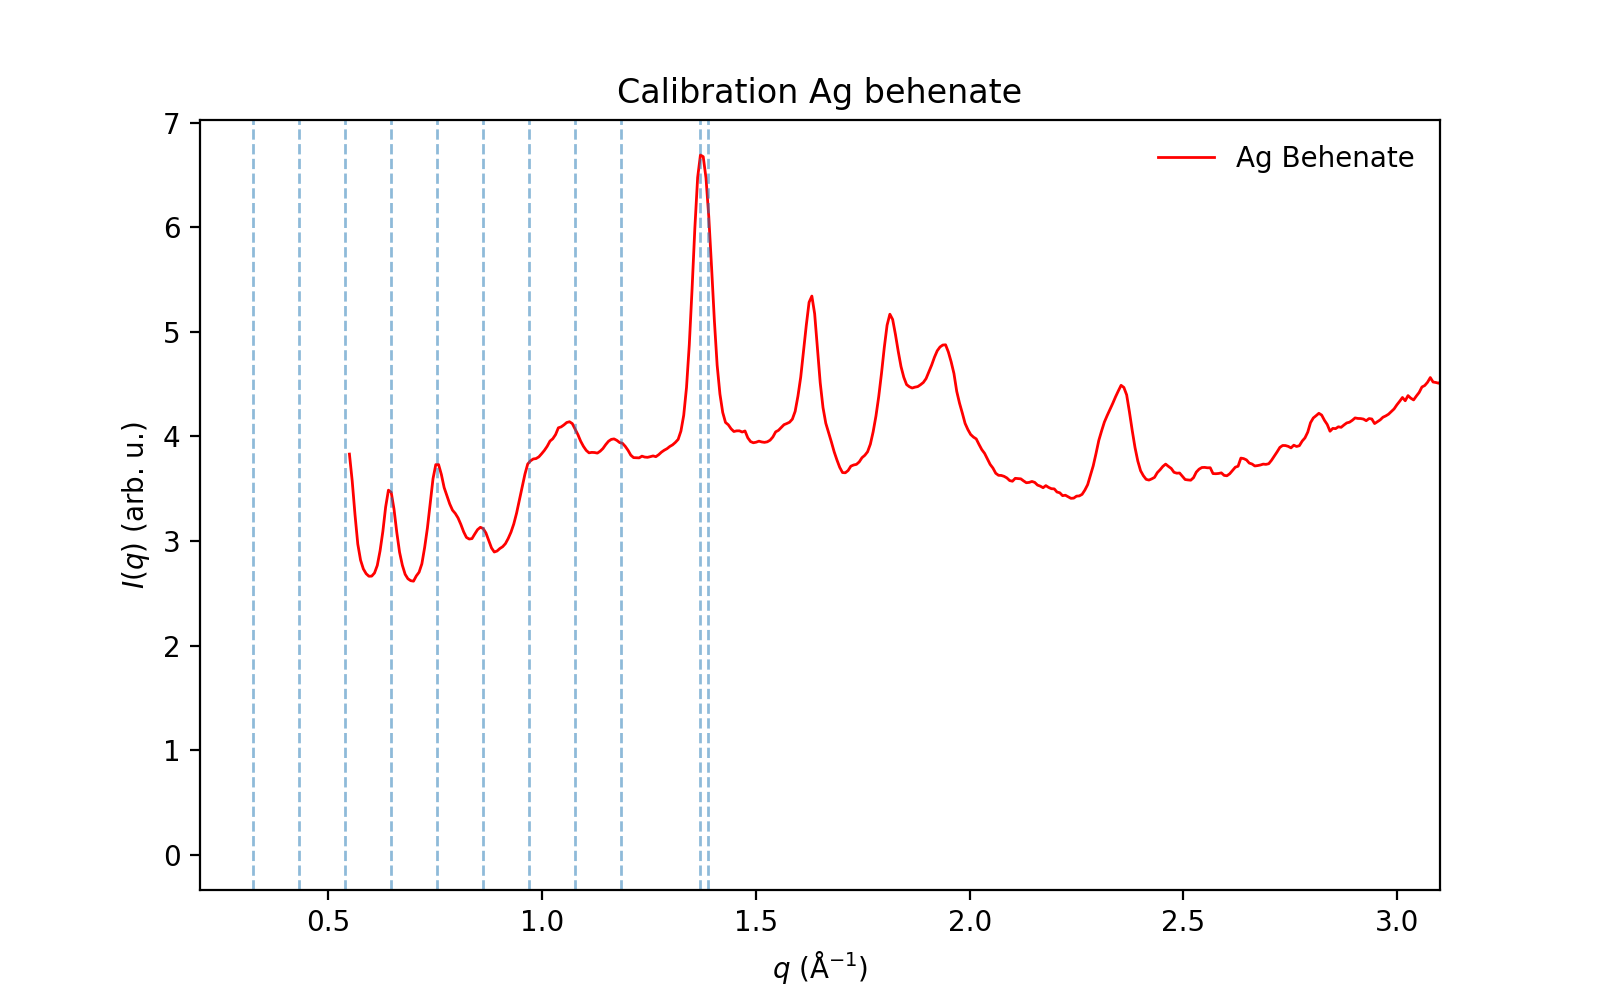

In [16]:
plt.figure(figsize=(8,5))

plt.plot(q,Iq_agbeh/t_exp,'-', lw =1,c='red',label = 'Ag Behenate',alpha=1)
for i in range(2,len(ag_beh)):
    plt.axvline(x = ag_beh[i],ls ='--', lw=1, alpha=0.5)
    
plt.axvline(x = q[410],ls ='--', c='grey', lw=1, alpha=0.5)
    
plt.xlim([0.2,3.1])
#plt.ylim([0.1,25])
#plt.yscale('log')
plt.xlabel(r'$q$ (Å$^{-1}$)')
plt.ylabel('$I(q)$ (arb. u.)')
plt.legend(frameon=False,fontsize=10, loc='upper right')
plt.title('Calibration Ag behenate')
plt.show()

<IPython.core.display.Javascript object>


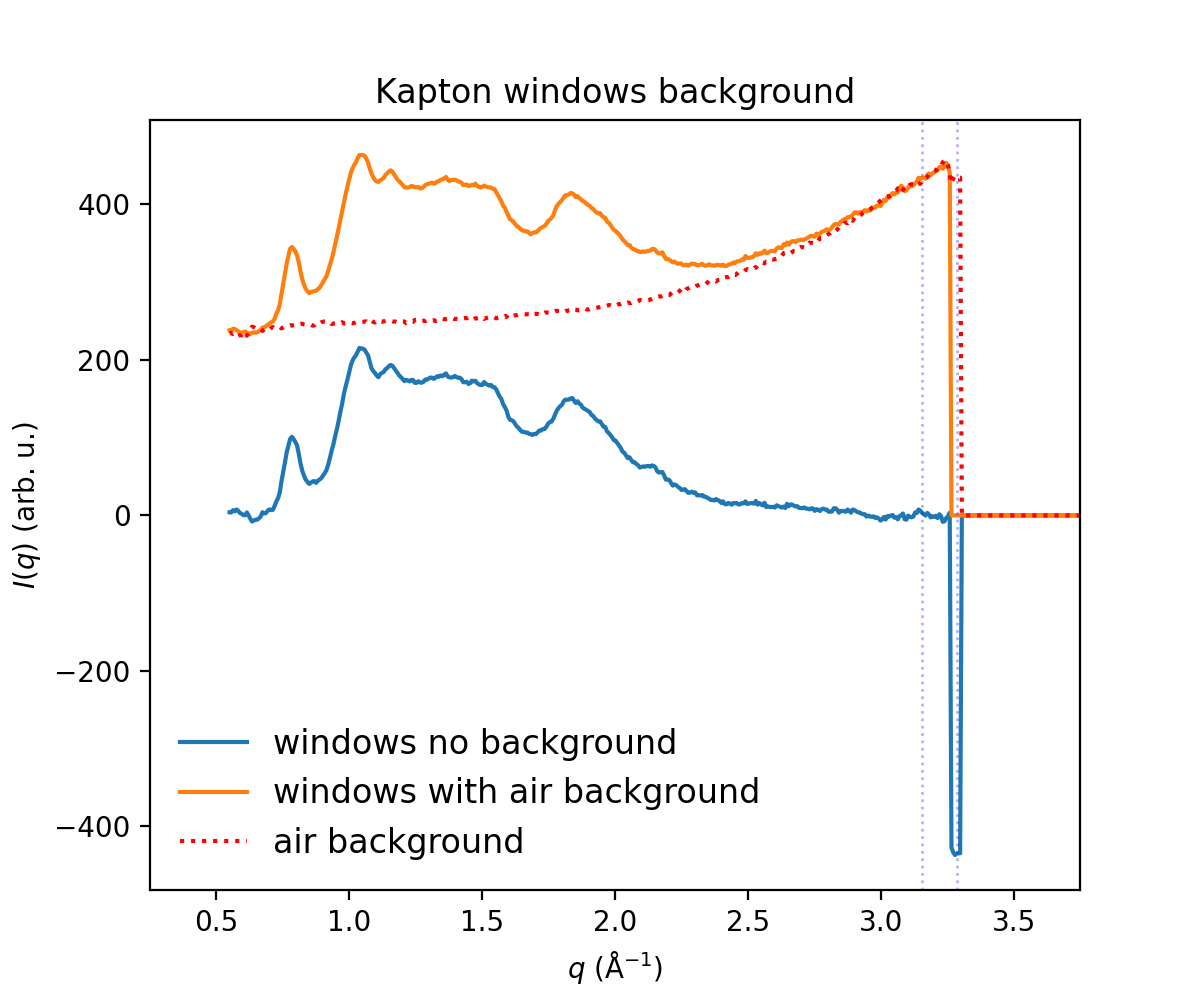

In [17]:
holder = 'windows'
xray = 'Cu'
get_data(holder, xray)


Iq=Iq_bg[:len(Iq_bg)]

plt.figure(figsize=(6,5))
    
Iq_kapton_win, w_air, off_air = subtr_air(Iq,Iq_air)
#Iq_kapton_win,w_air, off_air = subtr_offset(Iq,Iq_air,1.25)
Iq_air_fitted = (w_air*Iq_air-off_air)
    
plt.plot(q, Iq_kapton_win, label=f'{holder} no background')
plt.plot(q, Iq,ms=3, label=f'{holder} with air background')
plt.plot(q, (Iq_air_fitted), 'r:',label='air background')
plt.axvline(x=q[400], c='blue', lw=1, alpha=0.3,ls=':')
plt.axvline(x=q[420], c='blue', lw=1, alpha=0.3,ls=':')

plt.xlim([0.25,3.75])
plt.legend(frameon=False,fontsize=12)
plt.xlabel(r'$q$ (Å$^{-1}$)')
plt.ylabel('$I(q)$ (arb. u.)')
plt.title(f'Kapton windows background')
plt.show()

<IPython.core.display.Javascript object>


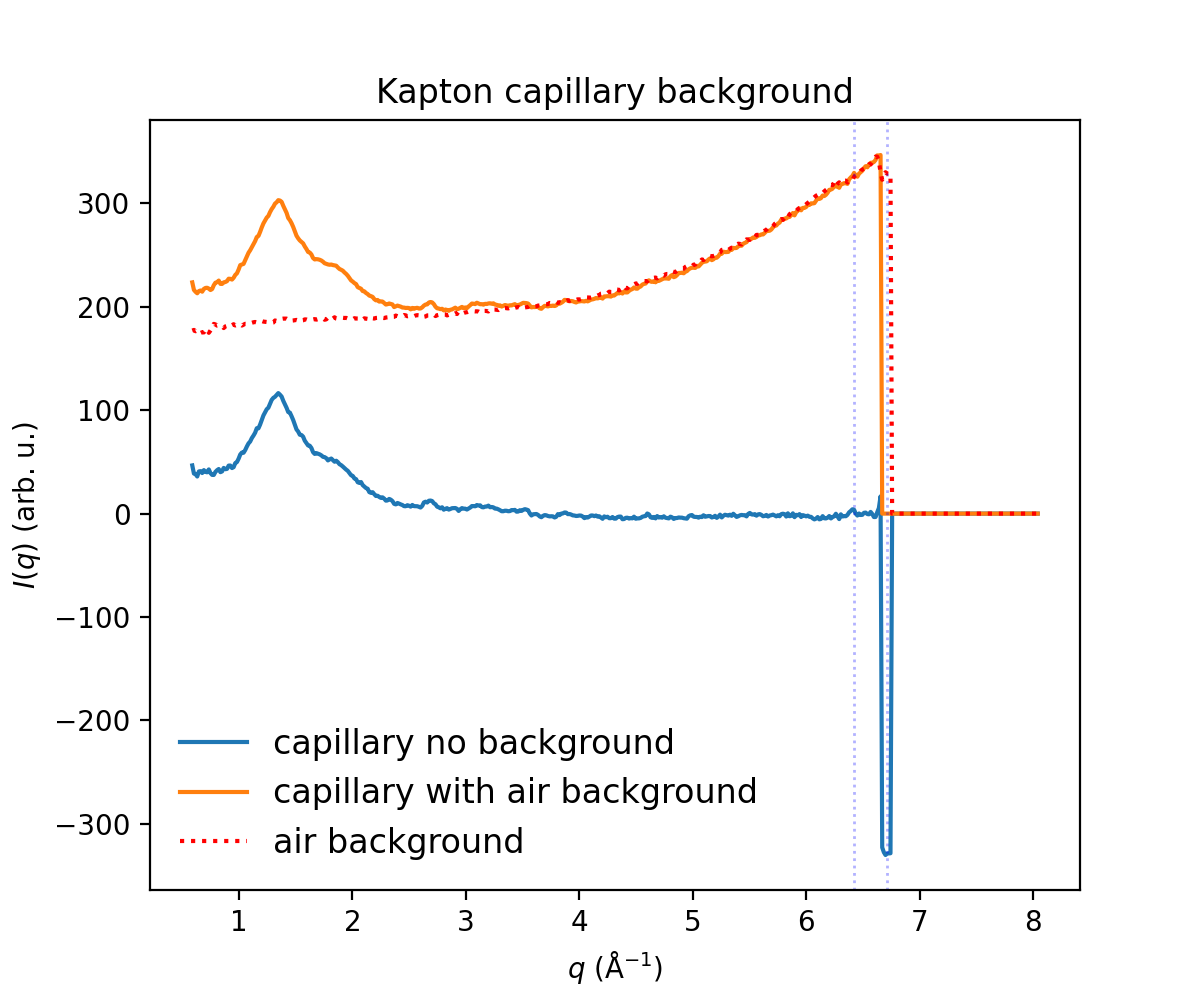

In [19]:
holder = 'capillary'
xray = 'Mo'
get_data(holder, xray)


Iq=Iq_bg[:len(Iq_bg)]

plt.figure(figsize=(6,5))
    
Iq_kapton,w_air, off_air = subtr_air(Iq,Iq_air)
#Iq_kapton,w_air, off_air = subtr_offset(Iq,Iq_air,1)
#Iq_kapton /= t_exp
Iq_air_fitted = (w_air*Iq_air-off_air)
    
plt.plot(q, Iq_kapton, label=f'{holder} no background')
plt.plot(q, Iq,ms=3, label=f'{holder} with air background')
plt.plot(q, (Iq_air_fitted), 'r:',label='air background')
plt.axvline(x=q[400], c='blue', lw=1, alpha=0.3,ls=':')
plt.axvline(x=q[420], c='blue', lw=1, alpha=0.3,ls=':')

#plt.xlim([0.25,3.75])
plt.legend(frameon=False,fontsize=12)
plt.xlabel(r'$q$ (Å$^{-1}$)')
plt.ylabel('$I(q)$ (arb. u.)')
plt.title(f'Kapton capillary background')
plt.show()

## DMSO-water in windows (~100um sample thickness)

<IPython.core.display.Javascript object>


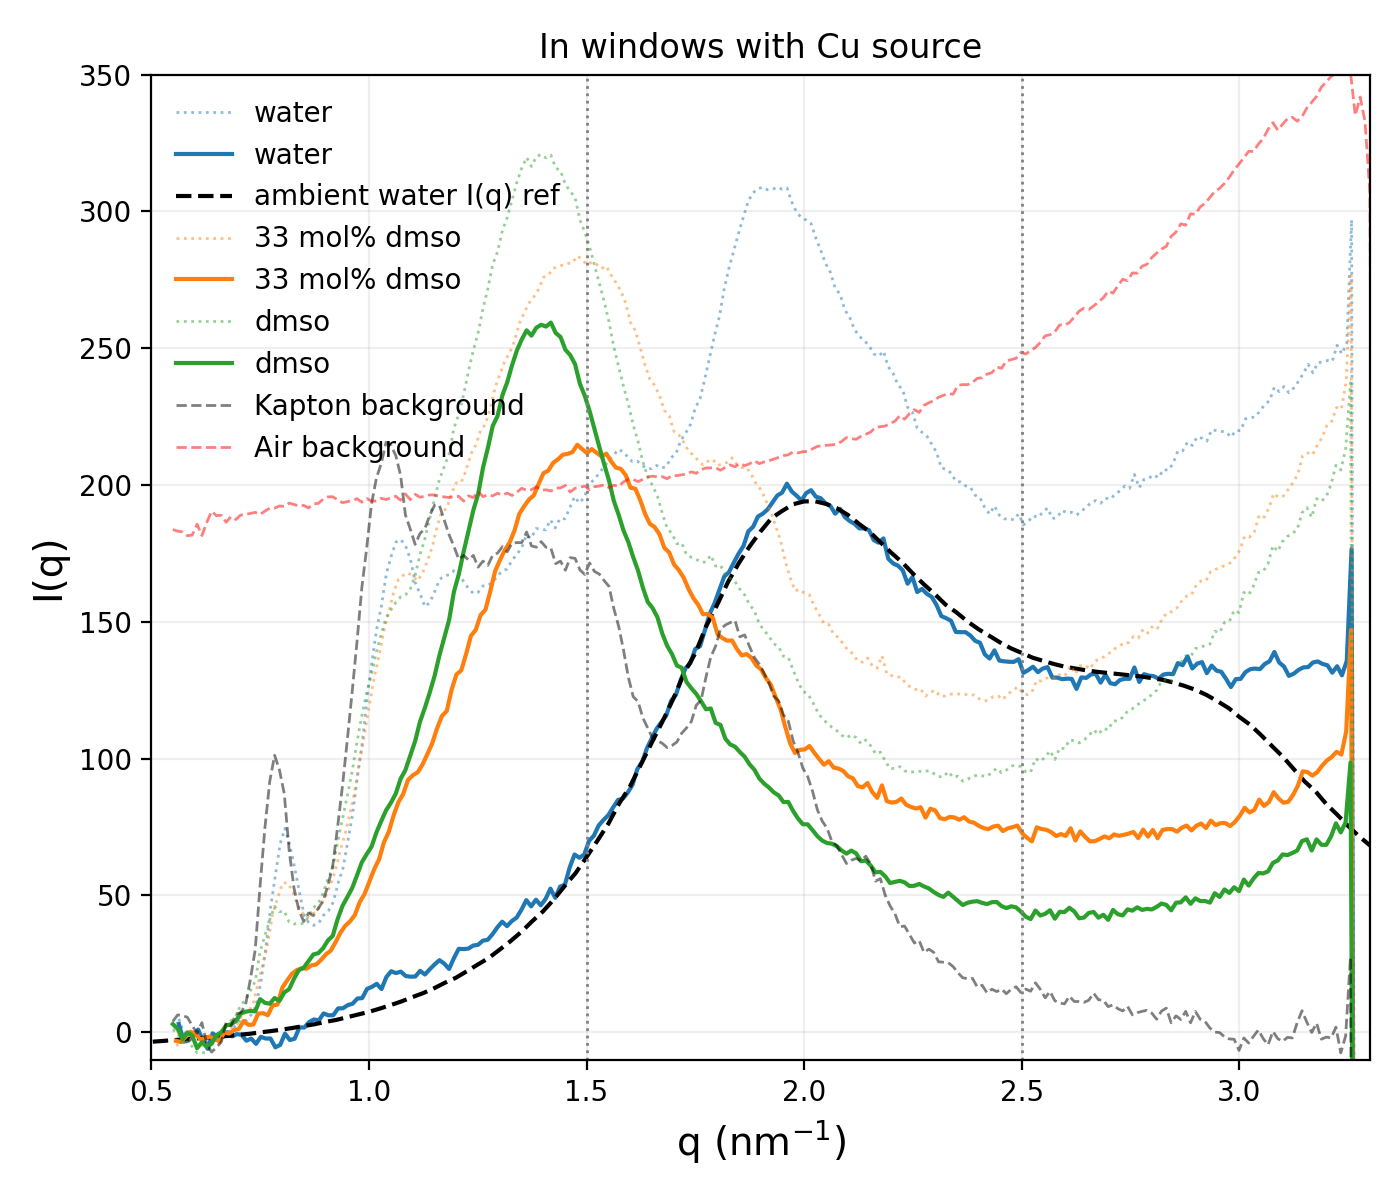

In [20]:
# plot files of interest
holder = 'windows'
xray = 'Cu'
get_data(holder, xray)

Iq = [Iq_wat, Iq_dmso33, Iq_dmso]
labels = ['water','33 mol% dmso','dmso']

plt.figure(figsize=(7,6))

if (holder=='windows')&(xray=='Cu'):
    qshift = [1.025,1.013,1]
    weights_air = [0.75,0.8,0.8] 
    weights = [0.7,0.35,0.3] 

for i in range(3):
    
    Iq_kapton_interp = interp1d(q*qshift[i], Iq_kapton_win, kind='cubic')
    Iq_air_interp = interp1d(q*qshift[i], Iq_air, kind='cubic')
    qvals = np.linspace(q[0]*qshift[i],q[-1], 300)
    
    Iq_interp = interp1d(q, Iq[i], kind='cubic')
    l, = plt.plot(qvals, Iq_interp(qvals)-Iq_interp(qvals[10]), ':', lw=1., alpha=0.5, label=labels[i]) 
    
    # subtract background
    #Iq_noair,w_air, offs_air = subtr_offset2(Iq_interp(qvals),Iq_air_interp(qvals))
    Iq_noair,w_air, offs_air = subtr_offset(Iq_interp(qvals),Iq_air_interp(qvals),weights_air[i])
    #Iq_nobg, w, offs = subtr_offset2(Iq_noair,Iq_kapton_interp(qvals)) 
    Iq_nobg, w, offs = subtr_offset(Iq_noair,Iq_kapton_interp(qvals),weights[i]) 
    plt.plot(qvals, Iq_nobg-Iq_nobg[10], '-', color=l.get_color(), lw=1.5, label=labels[i])
    
    # fit water
    if i==0:
    #########################
        fit1 = 50
        fit2 = 200
        Iqfitted, factor, baseline = fit_signal(q_wat_ref[fit1:len(Iq_wat_ref)-fit2],Iq_wat_ref[fit1:len(Iq_wat_ref)-fit2], qvals, Iq_nobg-Iq_nobg[10])
        plt.plot(q_wat_ref, Iq_wat_ref*factor+baseline,'k--', label='ambient water I(q) ref')
    ###########################

# plot background
plt.plot(qvals, Iq_kapton_interp(qvals), '--', c='k', lw=1, alpha=0.5, label='Kapton background')
plt.plot(qvals, Iq_air_interp(qvals), '--', c='r', lw=1, alpha=0.5, label='Air background')
    
#for i in range(len(Ih_ref)-4):
   #  plt.axvline(x=Ih_ref[i], c='gray', lw=1, alpha=1,ls='-.')
        
plt.axvline(x=q_wat_ref[fit1], c='gray', lw=1, alpha=1,ls=':')
plt.axvline(x=q_wat_ref[len(Iq_wat_ref)-fit2], c='gray', lw=1, alpha=1,ls=':')

plt.xlabel(r'q ($\rm nm^{-1}$)', fontsize=14)
plt.ylabel(r'I(q)', fontsize=14)
plt.xlim(0.5, 3.3)
plt.ylim(-10, 350)
plt.grid(True, alpha=0.2)
plt.legend(frameon=False)
plt.title(f'In {holder} with {xray} source')

plt.tight_layout()
plt.show()

## Water in from different sample environment and X-ray energies

<IPython.core.display.Javascript object>


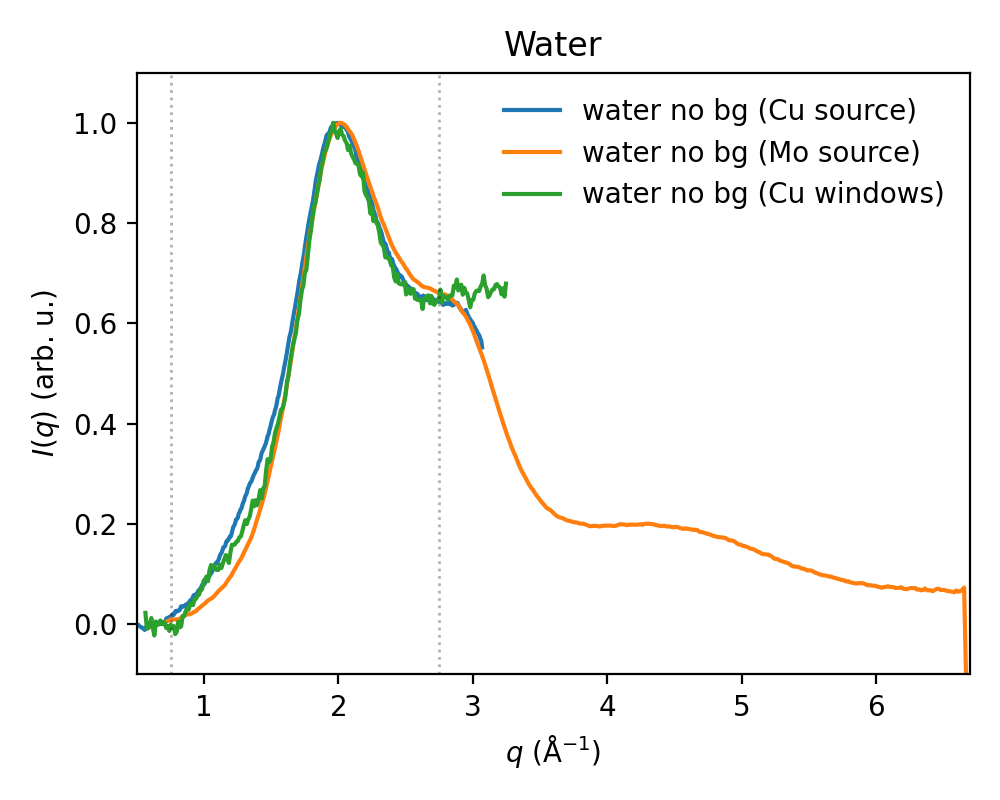

/var/folders/t0/b62grl953r99pk13mhcqq_v40000gn/T/ipykernel_61631/4285447904.py:70: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda x: interp_curve(x), a, b)


In [21]:
#plt.figure(figsize=(6.5,5.5))
plt.figure(figsize=(5,4), tight_layout=True)

for i in range(3):

    if i==0:
        holder = 'capillary'
        xray = 'Cu'
        get_data(holder, xray)
        Iq_noair,w_air, offs_air = subtr_offset(Iq_wat,Iq_air,.5)
        Iq_nobg, w, offs = subtr_offset(Iq_noair,Iq_kapton,0.05)
        label_text='Cu source'
        xmax=417

    elif i==1:
        holder = 'capillary'
        xray = 'Mo'
        get_data(holder, xray)
        Iq_nobg, w, offs = subtr_offset(Iq_wat, Iq_bg, w=1.)
        label_text='Mo source'
        xmax=-1
        
    elif i==2:
        holder = 'windows'
        xray = 'Cu'
        get_data(holder, xray)
        qshift = 1.025
        weights_air = 0.75
        weights = 0.7
        Iq_kapton_interp = interp1d(q*qshift, Iq_kapton_win, kind='cubic')
        Iq_air_interp = interp1d(q*qshift, Iq_air, kind='cubic')
        Iq_interp = interp1d(q, Iq_wat, kind='cubic')
        qvals = np.linspace(q[0]*qshift,q[-1], 300)
        Iq_noair,w_air, offs_air = subtr_offset(Iq_interp(qvals),Iq_air_interp(qvals),weights_air)
        Iq_nobg, w, offs = subtr_offset(Iq_noair,Iq_kapton_interp(qvals),weights)   
        q=qvals 
        label_text='Cu windows'
        xmax=243

    y = Iq_nobg/t_exp 
    Int_y,_ = int_curve(q, y, 0.66, 2.8)
    y /= Int_y
    y = y-np.mean(y[(0.6<q)&(q<0.7)])

    plt.plot(q[:xmax], y[:xmax]/y.max(), label='water no bg (%s)' %label_text)


    fit1 = 20
    fit2 = 190
    Iqfitted, factor, baseline = fit_signal(q_wat_ref[fit1:len(Iq_wat_ref)-fit2],Iq_wat_ref[fit1:len(Iq_wat_ref)-fit2], q, y/y.max())

plt.axvline(x=q_wat_ref[fit1], c='k', lw=1, alpha=0.3,ls=':')
plt.axvline(x=q_wat_ref[len(Iq_wat_ref)-fit2], c='k', lw=1, alpha=0.3,ls=':')

plt.xlim([0.5,6.7])
plt.ylim([-0.1,1.1])
plt.xlabel(r'$q$ (Å$^{-1}$)')
plt.ylabel('$I(q)$ (arb. u.)')
plt.title('Water')
plt.legend(frameon=False,fontsize=10, loc='best')
plt.show()

## DMSO-water: differerent sample environments and X-ray sources

<IPython.core.display.Javascript object>


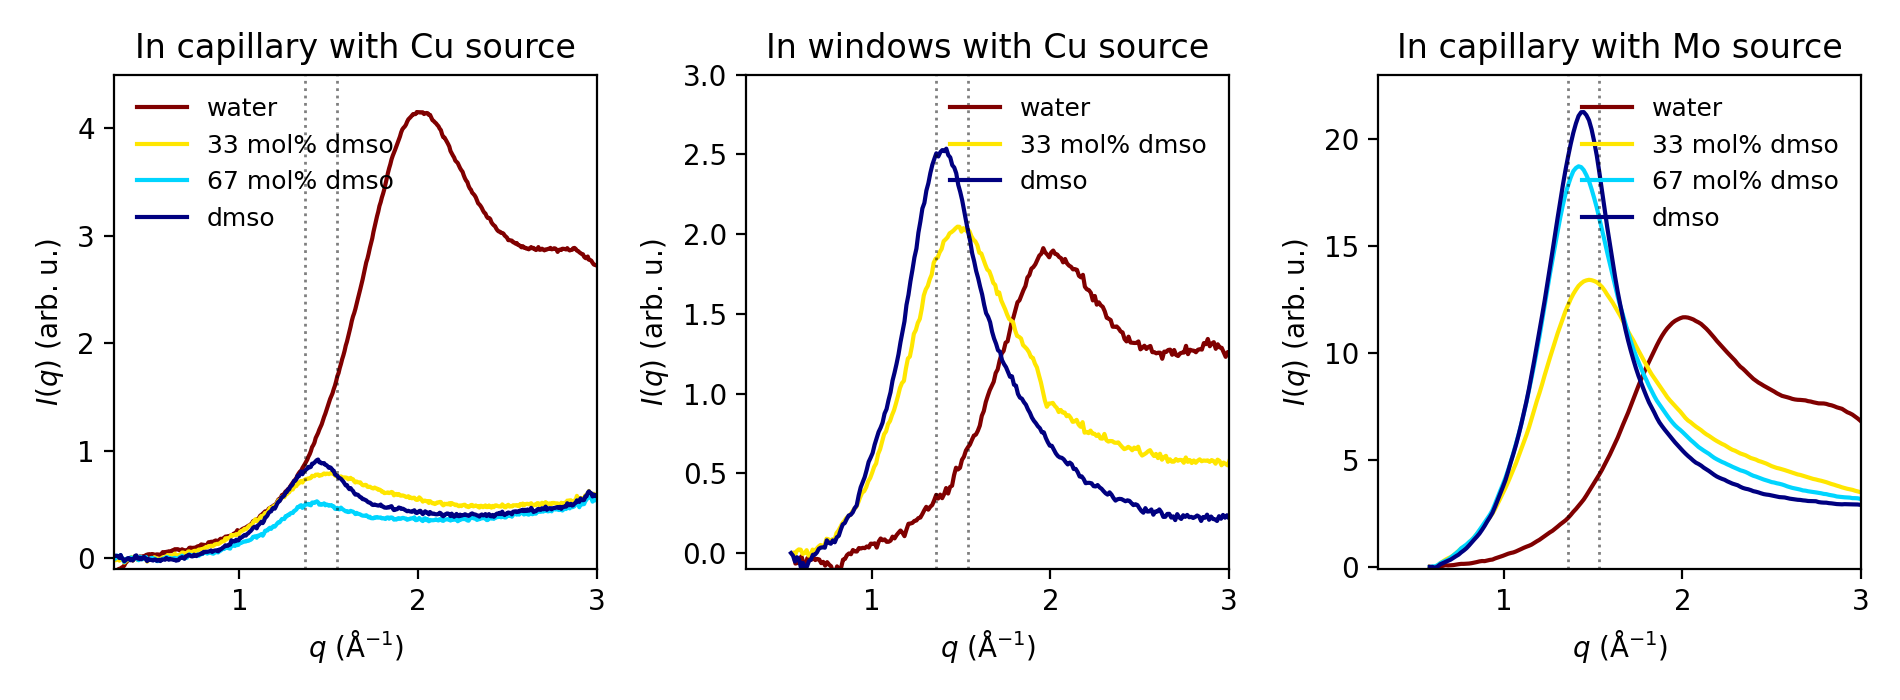

1.9916953395305528
4.152804665204922
1.5136815187815358
0.7947870210581104
1.4328904504859272
0.530756537906811
1.4396230395105611
0.9189677640722658
1.9603592857462888
1.9122151619530134
1.4807731144122929
2.0467596264216485
1.4179557711958883
2.5358377706471615
2.0170776731160096
11.664748596191407
1.477299512733952
13.414603408813475
1.418945117016973
18.718202674865722
1.4481223148754625
21.25058334350586


In [22]:
peakmax = np.zeros((3,4))
peak_qmax = np.zeros((3,4))

fig, axs = plt.subplots(1,3,figsize=(9.5,3.5), tight_layout=True)
col = plt.cm.jet(np.linspace(1,0,4)) 

for jj in range(1): # row of subplot
    for j in range(3): # type of measurement
        N = [0,1,2,3]
        if j==1:
            N=[0,1,3]
        for i in N: # concentrations

            if j==0:
                holder = 'capillary'
                xray = 'Cu'
                get_data(holder, xray)
                Iq = [Iq_wat, Iq_dmso33, Iq_dmso67, Iq_dmso]
                labels = ['water','33 mol% dmso', '67 mol% dmso', 'dmso']
                weights_air = [0.5,0.9,1.,1.]
                weights = [None,0.,0.,0.]
                if i==0:
                    Iq_nobg, w, offs = subtr_offset1(Iq[i],Iq_bg)
                elif i>0:
                    Iq_noair,w_air, offs_air = subtr_offset2(Iq[i],Iq_air) 
                    Iq_nobg, w, offs = subtr_offset2(Iq_noair,Iq_kapton)
                Iq_nobg = Iq_nobg #-Iq_nobg[40]
                xmax, ymax, ymax2 = 3, 4.5, 1.5
                qs=q

            elif j==1:
                holder = 'windows'
                xray = 'Cu'
                get_data(holder, xray)
                Iq = [Iq_wat, Iq_dmso33, None, Iq_dmso]
                labels = ['water','33 mol% dmso', None,'dmso']
                qshift = [1.025,1.018,None,1]
                weights_air = [0.75,1.,None,1.] 
                weights = [0.75,0.4,None,0.3] 
                Iq_kapton_interp = interp1d(q*qshift[i], Iq_kapton_win, kind='cubic')
                Iq_air_interp = interp1d(q*qshift[i], Iq_air, kind='cubic')
                Iq_interp = interp1d(q, Iq[i], kind='cubic')
                qvals = np.linspace(q[0]*qshift[i],q[-1], 300)
                Iq_noair,w_air, offs_air = subtr_offset(Iq_interp(qvals),Iq_air_interp(qvals),weights_air[i])
                Iq_nobg, w, offs = subtr_offset(Iq_noair,Iq_kapton_interp(qvals),weights[i])   
                Iq_nobg = Iq_nobg -Iq_nobg[0]
                xmax, ymax, ymax2 = 3, 3, 1.5
                qs=qvals       

            elif j==2:
                holder = 'capillary'
                xray = 'Mo'
                get_data(holder, xray)
                Iq = [Iq_wat, Iq_dmso33, Iq_dmso67, Iq_dmso]
                labels = ['water','33 mol% dmso', '67 mol% dmso', 'dmso']
                weights = [0.8,0.9,0.95,1]
                Iq_nobg, w, offs = subtr_offset(Iq[i], Iq_bg, w=weights[i])
                Iq_nobg = Iq_nobg -Iq_nobg[0]
                xmax, ymax, ymax2 = 3, 23, 1.5
                qs=q    

            Iq_nobg /= t_exp

            y = Iq_nobg
            peakmax[j,i] = np.max(y[(qs>1)&(qs<2.2)])
            peak_qmax[j,i] = qs[(qs>1)&(qs<2.2)][np.argmax(y[(qs>1)&(qs<2.2)])]
            print(peak_qmax[j,i])
            print(peakmax[j,i])

            axs[j].plot(qs, y, color=col[i], label=labels[i])

        axs[j].axvline(x=qs[qs>1.36].min(), c='k', lw=1, alpha=0.5,ls=':')
        axs[j].axvline(x=qs[qs<1.55].max(), c='k', lw=1, alpha=0.5,ls=':')

        axs[j].set_xlim([0.3,xmax])
        if jj==0:
            axs[j].set_ylim([-0.1,ymax])
            axs[j].set_ylabel('$I(q)$ (arb. u.)')

        axs[j].legend(frameon=False,loc='best', fontsize=9)
        axs[j].set_xlabel(r'$q$ (Å$^{-1}$)')
        axs[j].set_title(f'In {holder} with {xray} source')
plt.tight_layout()
plt.savefig('plot1',dpi=300)
plt.show()

In [23]:
peakmax[peakmax==0] = np.nan
peak_qmax[peak_qmax==0] = np.nan
peakmax, peak_qmax

(array([[ 4.15280467,  0.79478702,  0.53075654,  0.91896776],
        [ 1.91221516,  2.04675963,         nan,  2.53583777],
        [11.6647486 , 13.41460341, 18.71820267, 21.25058334]]),
 array([[1.99169534, 1.51368152, 1.43289045, 1.43962304],
        [1.96035929, 1.48077311,        nan, 1.41795577],
        [2.01707767, 1.47729951, 1.41894512, 1.44812231]]))

<IPython.core.display.Javascript object>


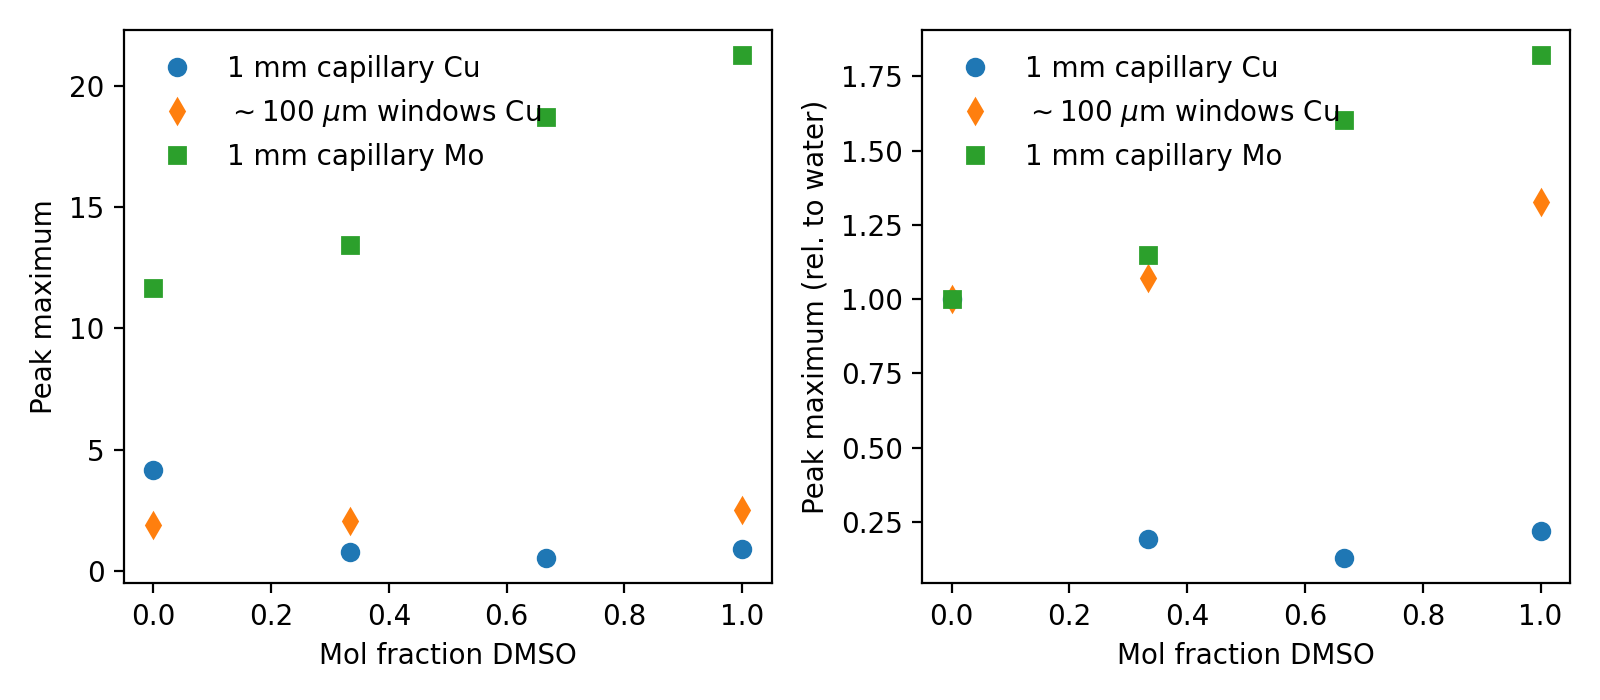

Text(0, 0.5, 'Peak maximum (rel. to water)')

In [24]:
labels=['1 mm capillary Cu',r'$\sim100$ $\mu$m windows Cu', '1 mm capillary Mo']
marker = ['o','d','s']

fig, axs = plt.subplots(1,2,figsize=(8,3.5), tight_layout=True)
for i in range(3):
    axs[0].plot([0,1/3,2/3,1],peakmax[i,:],marker[i],label=labels[i])
axs[0].legend(frameon=False)
axs[0].set_xlabel('Mol fraction DMSO')
axs[0].set_ylabel('Peak maximum')

for i in range(3):
    axs[1].plot([0,1/3,2/3,1],peakmax[i,:]/peakmax[i,0],marker[i],label=labels[i])
axs[1].legend(frameon=False)
axs[1].set_xlabel('Mol fraction DMSO')
axs[1].set_ylabel('Peak maximum (rel. to water)')

In [28]:
Cu_energy = 8.0478       # keV, energy of the beam (Cu K\alpha) http://gisaxs.com/index.php/X-ray_energy
Mo_energy = 17.45       # keV, energy of the beam (Mo K\alpha) http://gisaxs.com/index.php/X-ray_energy

## Attenuation lengths

In [29]:
# attenuation lengths in um vs photon energy in keV, from https://henke.lbl.gov/optical_constants/atten2.html

att_len_water = np.loadtxt('source/att_len_water.txt', skiprows=2) 
att_len_water_fun = interp1d(att_len_water[:,0]*1e-3, att_len_water[:,1], kind='cubic')

att_len_33dmso = np.loadtxt('source/att_len_33dmso.txt', skiprows=2) 
att_len_33dmso_fun = interp1d(att_len_33dmso[:,0]*1e-3, att_len_33dmso[:,1], kind='cubic')

att_len_67dmso = np.loadtxt('source/att_len_67dmso.txt', skiprows=2) 
att_len_67dmso_fun = interp1d(att_len_67dmso[:,0]*1e-3, att_len_67dmso[:,1], kind='cubic')

att_len_dmso = np.loadtxt('source/att_len_dmso.txt', skiprows=2) 
att_len_dmso_fun = interp1d(att_len_dmso[:,0]*1e-3, att_len_dmso[:,1], kind='cubic')


In [30]:
def get_transm(E_keV, d, sample='water'):
    
    "returns the sample transmission. photon energy E_keV in keV and sample thickness d in microns"
    
    # tabulated attenuation length in um
    att_len = np.loadtxt(f'source/att_len_{sample}.txt', skiprows=2) 
    att_len_fun = interp1d(att_len[:,0]*1e-3, att_len[:,1], kind='cubic')
    
    return np.exp(-1/att_len_fun(E_keV) * d) 

### plot attenuation lengths and sample transmissions

<IPython.core.display.Javascript object>


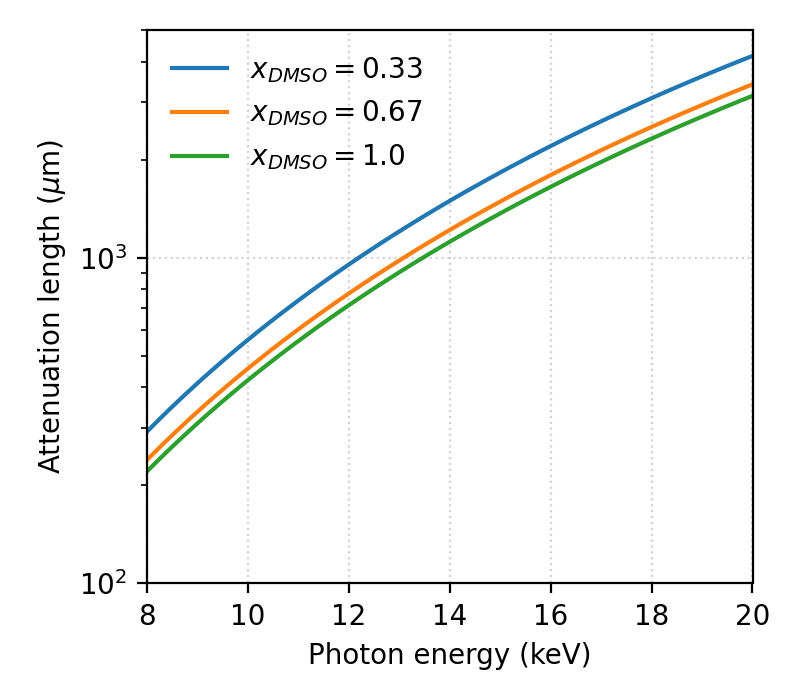

<IPython.core.display.Javascript object>


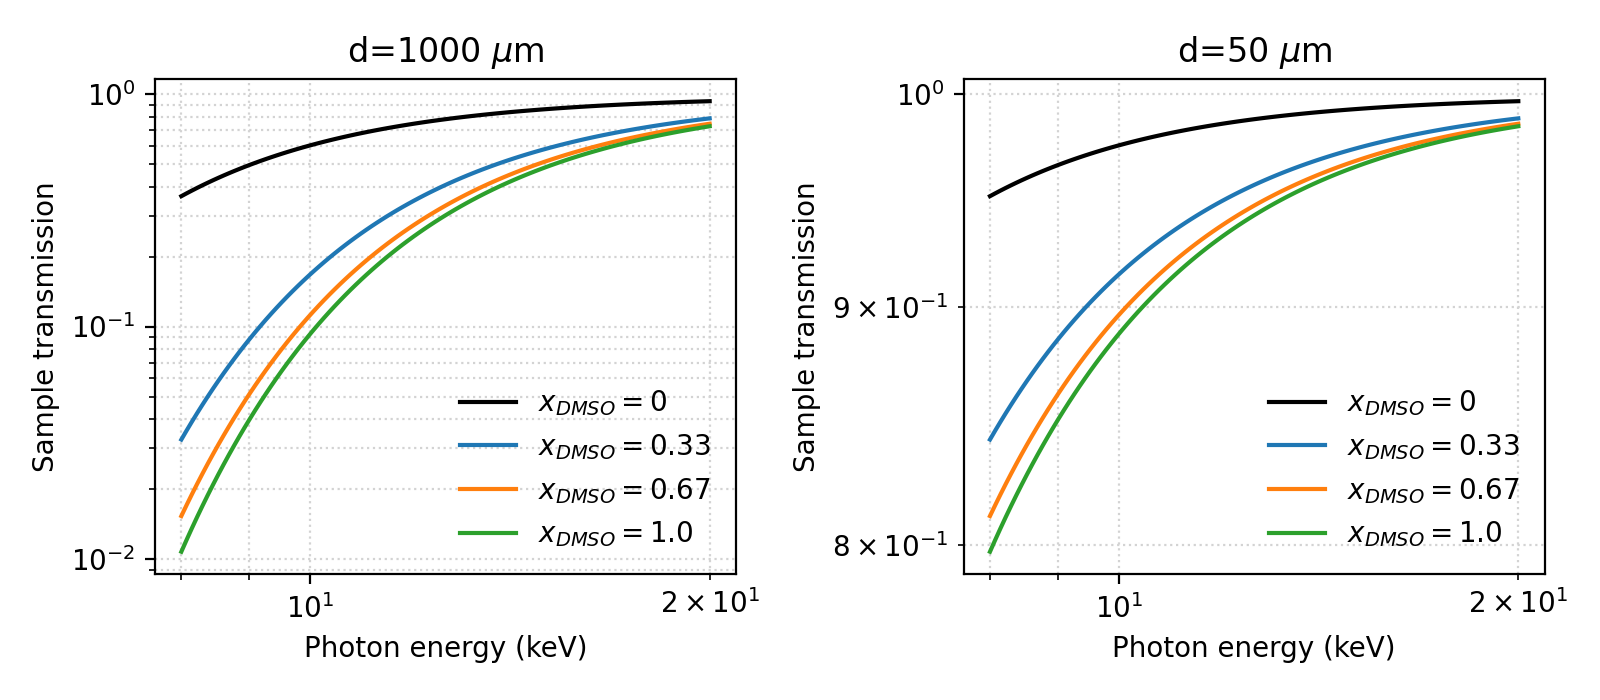

In [31]:
   
plt.figure(figsize=(4,3.5))
#plt.plot(att_len_water[:,0]*1e-3, att_len_water_fun(att_len_water[:,0]*1e-3))
l1, = plt.plot(att_len_33dmso[:,0]*1e-3, att_len_33dmso_fun(att_len_33dmso[:,0]*1e-3), label=r'$x_{DMSO}=0.33$')
l2, = plt.plot(att_len_67dmso[:,0]*1e-3, att_len_67dmso_fun(att_len_67dmso[:,0]*1e-3), label=r'$x_{DMSO}=0.67$')
l3, = plt.plot(att_len_dmso[:,0]*1e-3, att_len_dmso_fun(att_len_dmso[:,0]*1e-3), label=r'$x_{DMSO}=1.0$')
plt.xlim([8,20])
plt.ylim([100,5e3])
plt.yscale('log')
plt.legend(frameon=False)
plt.grid(which='major', linestyle=':', color='lightgrey')
plt.xlabel('Photon energy (keV)')
plt.ylabel(r'Attenuation length ($\mu$m)')
plt.tight_layout()

#plt.figure(figsize=(4,3.5))
fig, axs = plt.subplots(1,2,figsize=(8,3.5), tight_layout=True)
d=np.array([1000,50])
line=['-','-']
E_keVs = att_len_33dmso[:,0]*1e-3
for i in range(len(d)):
    axs[i].plot(E_keVs, get_transm(E_keVs, d[i], sample='water'), line[i], color='k', label=r'$x_{DMSO}=0$')
    axs[i].plot(E_keVs, get_transm(E_keVs, d[i], sample='33dmso'), line[i], color=l1.get_color(), label=r'$x_{DMSO}=0.33$')
    axs[i].plot(E_keVs, get_transm(E_keVs, d[i], sample='67dmso'), line[i], color=l2.get_color(), label=r'$x_{DMSO}=0.67$')
    axs[i].plot(E_keVs, get_transm(E_keVs, d[i], sample='dmso'), line[i], color=l3.get_color(), label=r'$x_{DMSO}=1.0$')
#plt.xlim([8,18])
#plt.ylim([0.6,1.])
    axs[i].legend(frameon=False)
    axs[i].grid(which='minor', linestyle=':', color='lightgrey')
    axs[i].grid(which='major', linestyle=':', color='lightgrey')
    axs[i].set_yscale('log')
    axs[i].set_xscale('log')
    axs[i].set_xlabel('Photon energy (keV)')
    axs[i].set_ylabel('Sample transmission')
    axs[i].set_title(r'd=%.d $\mu$m' %d[i])
plt.tight_layout()

plt.show()

### estimations for relative intensity

In [32]:
# water, 33 mol%, 67 mol%, 100 mol%
# chemical formula: H2O, SO3C2H10, S2O3C4H14, SOC2H6
# wt% dmso: 0, 68, 90, 100
# density (25C): 1.00, 1.09, 1.10, 1.10 # LeBel & Goring, J. Chem. Eng. Data 1962, 7, 1, 100–101 (https://pubs-acs-org.ezp.sub.su.se/doi/10.1021/je60012a032)

conc = np.array([0,0.33,0.67, 1]) # mol fraction dmso


# measured with XRD
E1 = Cu_energy   # keV Cu k-alpha
l1 = 1000 # um
transmission1 = np.array([get_transm(E1, l1,'water'),get_transm(E1, l1,'33dmso'),get_transm(E1, l1,'67dmso'), get_transm(E1, l1,'dmso')])  

E2 = Mo_energy # keV Mo k-alpha
transmission2 = np.array([get_transm(E2, l1,'water'),get_transm(E2, l1,'33dmso'),get_transm(E2, l1,'67dmso'), get_transm(E2, l1,'dmso')])  

l2=100 # um
transmission3 = np.array([get_transm(E1, l2,'water'),get_transm(E1, l2,'33dmso'),get_transm(E1, l2,'67dmso'), get_transm(E1, l2,'dmso')]) 


# for lcls
E3 = 9.5 # keV
l3 = 50 # um sample thickness
transmission_lcls = np.array([get_transm(E3, l3,'water'),get_transm(E3, l3,'33dmso'),get_transm(E3, l3,'67dmso'), get_transm(E3, l3,'dmso')])  

print(transmission1)
print(transmission2)
print(transmission3)
print(transmission_lcls)

[0.37053919 0.03461364 0.01643552 0.01160828]
[0.90559988 0.70198526 0.64791298 0.62409212]
[0.90548949 0.7143725  0.66309896 0.64043757]
[0.97068273 0.9014041  0.88065583 0.87112814]


In [33]:
print('Peak intensity rel. to water:')
maxval=np.empty((4,))
maxval2=np.empty((4,))
maxval3=np.empty((4,))

for i in range(4):
    maxval[i] = peakmax[1,i]*(transmission2[i]*l2)/(transmission1[i]*l1) 
    maxval2[i] = peakmax[2,i]*(transmission_lcls[i]*l3)/(transmission2[i]*l1) 
 
print('Mo cap 1 mm exp:', peakmax[2,:]/peakmax[2,0])
print('Cu cap 1 mm exp:', peakmax[0,:]/peakmax[0,0])
print('Cu windows exp:', peakmax[1,:]/peakmax[1,0]) # very uncertain but proves the trend

print(' ')
print('Estimations:')
#print('rel. to water, Cu predicted 100 um:', maxval/maxval[0]) # very uncertain
print('scattering intensity rel. to water, predicted 50 um 9.5 keV from Mo cap data:', maxval2/maxval2[0])

Peak intensity rel. to water:
Mo cap 1 mm exp: [1.         1.15001222 1.60468119 1.82177808]
Cu cap 1 mm exp: [1.         0.1913856  0.12780677 0.22128846]
Cu windows exp: [1.         1.07036053        nan 1.32612575]
 
Estimations:
scattering intensity rel. to water, predicted 50 um 9.5 keV from Mo cap data: [1.         1.37769487 2.03487317 2.37239976]
